<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/artificial-inteligence/AI-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [ ]:
dados = read_csv('/content/irisflower_20230306091353.data',sep=',')
dados

In [ ]:
X = dados.values[:,0:4]
Y = dados.values[:,4]


In [ ]:
Y

In [ ]:
X

In [ ]:
X = X.astype('float32')

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
Y2 = np_utils.to_categorical(encoded_y)
Y2

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y2,test_size=0.20)

In [ ]:
#rede neural
model = Sequential()
model.add(Dense(10,activation='tanh',kernel_initializer='he_normal',input_shape=(4,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [ ]:
#compilacao do modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=300,batch_size=32,verbose=1)

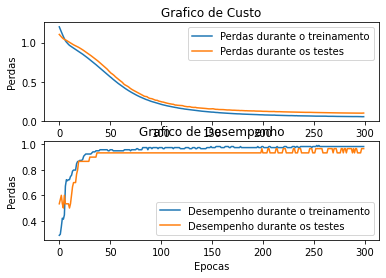

In [ ]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()

plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()
